 # This code performs Exploratory Data Analysis (EDA), which means:

Understanding the data 
Finding patterns 
Finding outliers
Seeing relationships visually

No prediction yet — this is the foundation before any machine learning.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
#reading the data from the file
import pandas as pd
data = pd.read_csv('dataset 1.csv')
print(data.head())

               home              seat           user_id              session  \
0  8868fe4de610d348  d6b7a54f96ce39a4  eefbc3f27093becc  2025-07-27-18-11-28   
1  8868fe4de610d348  d6b7a54f96ce39a4  eefbc3f27093becc  2025-07-27-18-11-28   
2  8868fe4de610d348  d6b7a54f96ce39a4  eefbc3f27093becc  2025-07-27-18-11-28   
3  8868fe4de610d348  d6b7a54f96ce39a4  eefbc3f27093becc  2025-07-27-18-11-28   
4  8868fe4de610d348  d6b7a54f96ce39a4  eefbc3f27093becc  2025-07-27-18-11-28   

   window  urinate  normal  no  hard  soft     weight  heartrate  temperature  \
0       1        1       1   0     0     0  46.610289        NaN    35.327988   
1       2        1       1   0     0     0  46.573018  67.964602    35.327988   
2       3        1       1   0     0     0  46.528367  64.537815    35.327988   
3       4        1       1   0     0     0  46.425224  62.439024    35.327988   
4       5        1       1   0     0     0  46.325638  60.472441    35.327988   

       comx      comy  
0  0.029

In [8]:
print(data.shape)
print(data.columns)
print(data.isna().sum())

(16388, 15)
Index(['home', 'seat', 'user_id', 'session', 'window', 'urinate', 'normal',
       'no', 'hard', 'soft', 'weight', 'heartrate', 'temperature', 'comx',
       'comy'],
      dtype='object')
home              0
seat              0
user_id           0
session           0
window            0
urinate           0
normal            0
no                0
hard              0
soft              0
weight         2619
heartrate      4826
temperature     647
comx           2619
comy           2619
dtype: int64


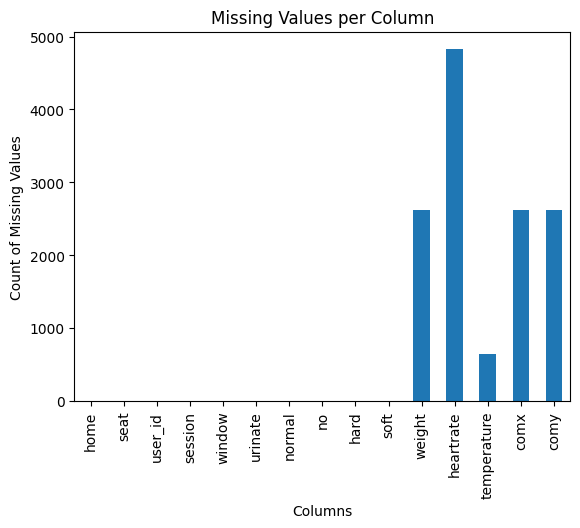

In [ ]:
# 2. MISSING VALUES VISUALIZATION

plt.figure()
data.isna().sum().plot(kind="bar")
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Count of Missing Values")
plt.show()

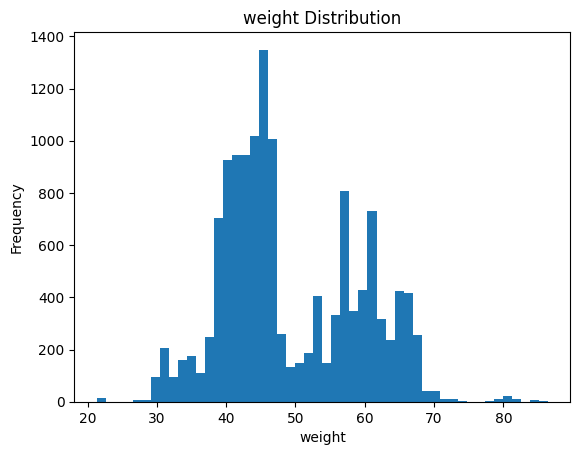

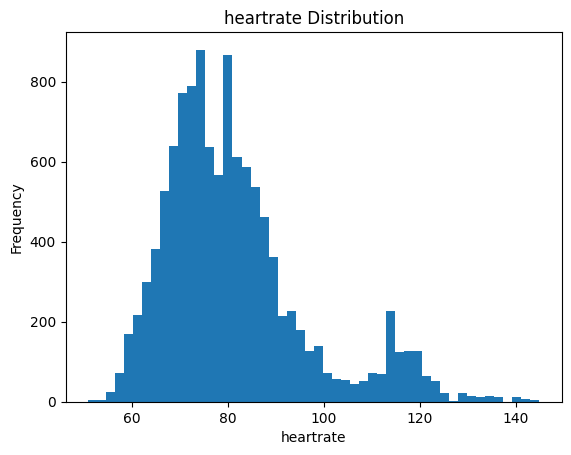

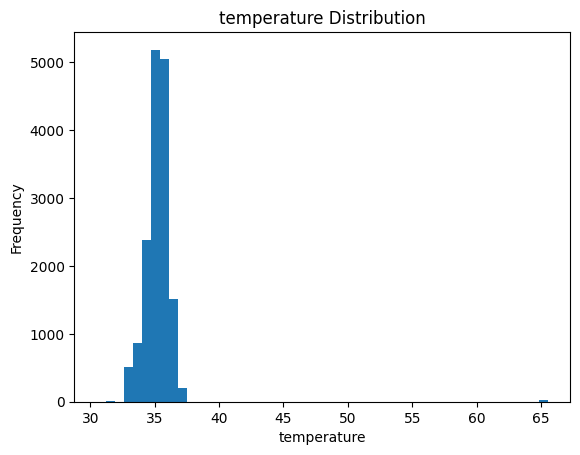

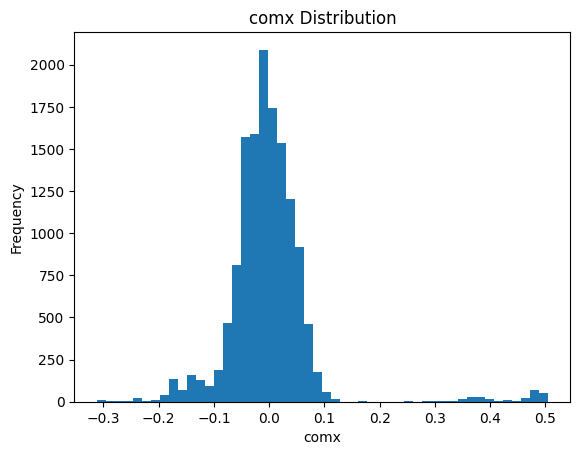

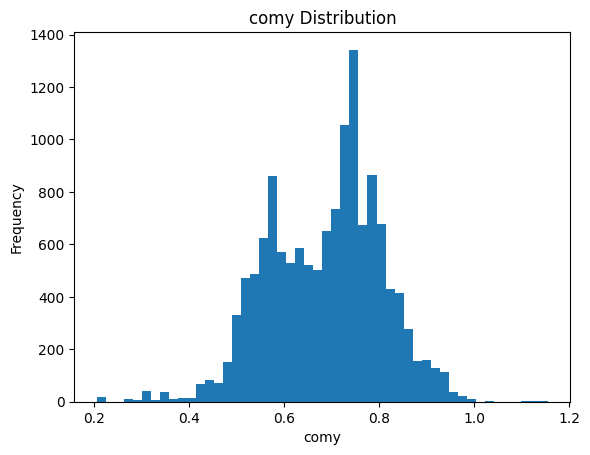

In [ ]:
#3. DISTRIBUTION PLOTS (HISTOGRAMS)

numeric_cols = ["weight", "heartrate", "temperature", "comx", "comy"]

for col in numeric_cols:
    plt.figure()
    plt.hist(data[col].dropna(), bins=50)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

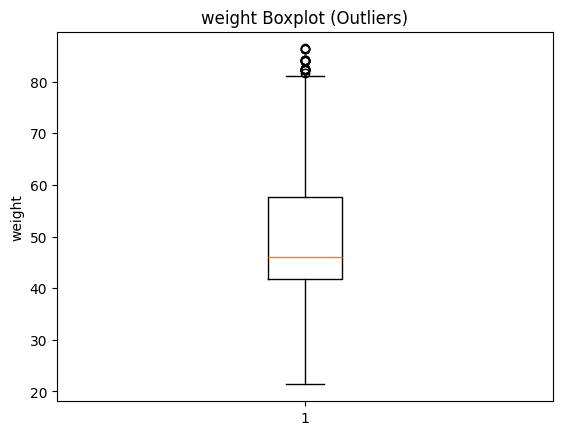

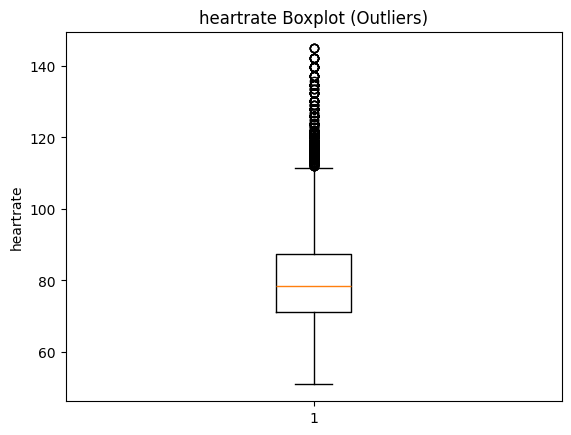

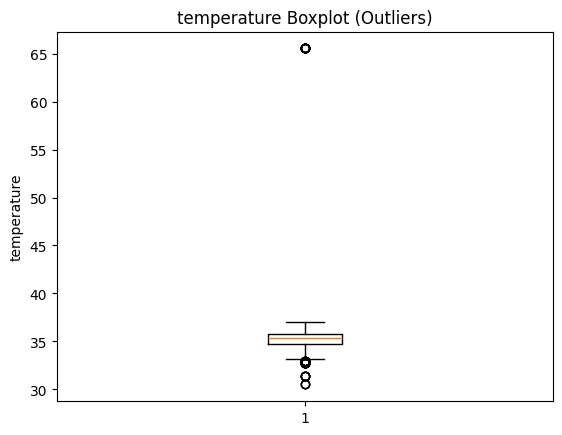

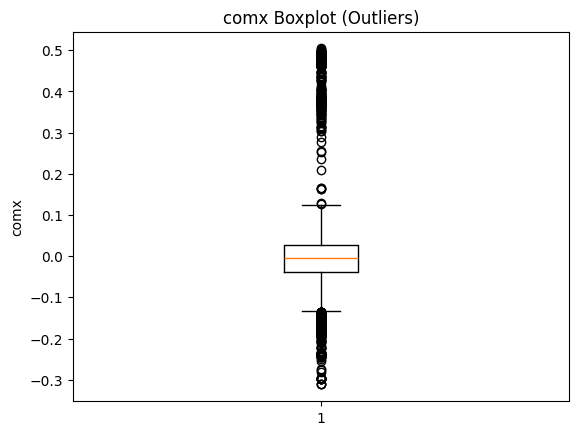

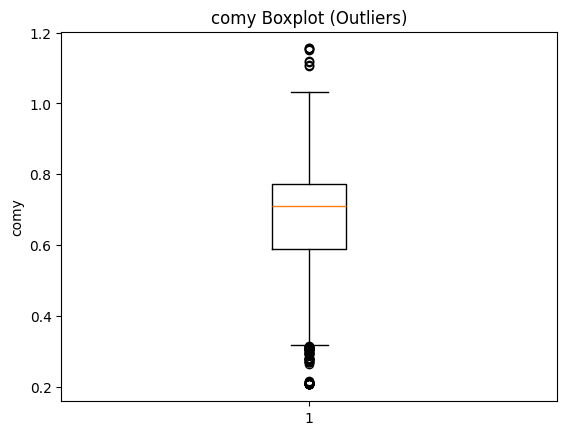

In [19]:
# 4. BOXPLOTS (OUTLIER DETECTION)
for col in numeric_cols:
    plt.figure()
    plt.boxplot(data[col].dropna())
    plt.title(f"{col} Boxplot (Outliers)")
    plt.ylabel(col)
    plt.show()

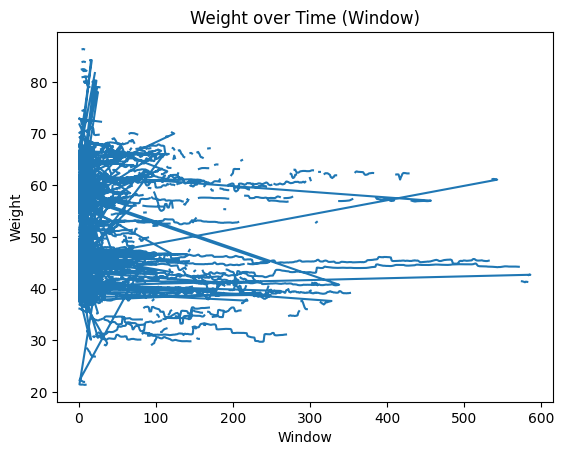

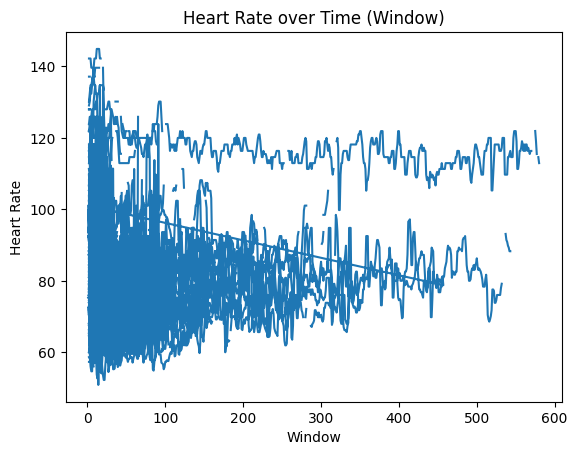

In [20]:
# 5. TIME-SERIES VISUALIZATION

plt.figure()
plt.plot(data["window"], data["weight"])
plt.title("Weight over Time (Window)")
plt.xlabel("Window")
plt.ylabel("Weight")
plt.show()

plt.figure()
plt.plot(data["window"], data["heartrate"])
plt.title("Heart Rate over Time (Window)")
plt.xlabel("Window")
plt.ylabel("Heart Rate")
plt.show()

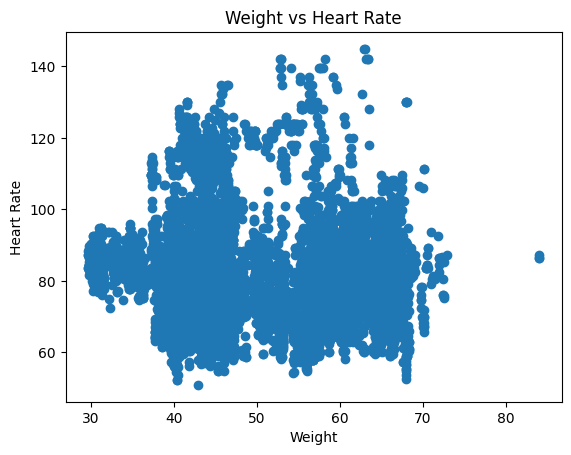

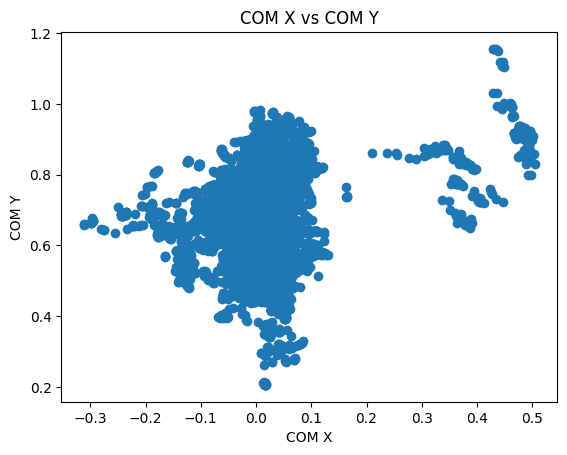

In [21]:
# 6. SCATTER PLOTS (RELATIONSHIPS)

plt.figure()
plt.scatter(data["weight"], data["heartrate"])
plt.title("Weight vs Heart Rate")
plt.xlabel("Weight")
plt.ylabel("Heart Rate")
plt.show()

plt.figure()
plt.scatter(data["comx"], data["comy"])
plt.title("COM X vs COM Y")
plt.xlabel("COM X")
plt.ylabel("COM Y")
plt.show()

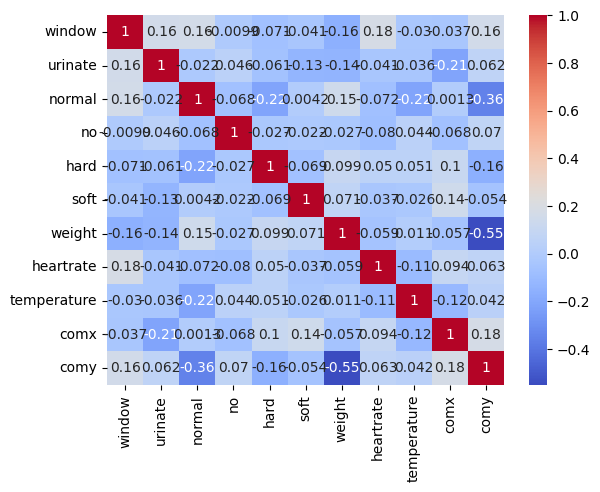

In [25]:
corr = data.select_dtypes(include=['number']).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# STEP 2 — DATA CLEANING + VISUAL VERIFICATION 

In [ ]:
# 2 Create a copy of the original data for cleaning
data_clean = data.copy()

# Now fill missing values
numeric_cols = ["weight", "heartrate", "temperature", "comx", "comy"]

for col in numeric_cols:
    data_clean[col] = data_clean[col].fillna(data_clean[col].median())

print("Missing values AFTER cleaning:")
print(data_clean.isna().sum())

Missing values AFTER cleaning:
home           0
seat           0
user_id        0
session        0
window         0
urinate        0
normal         0
no             0
hard           0
soft           0
weight         0
heartrate      0
temperature    0
comx           0
comy           0
dtype: int64


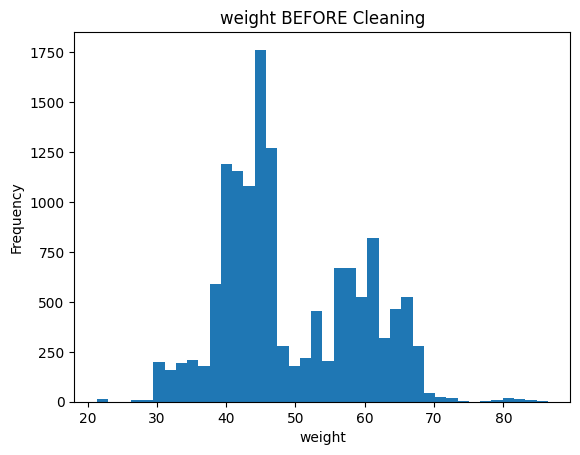

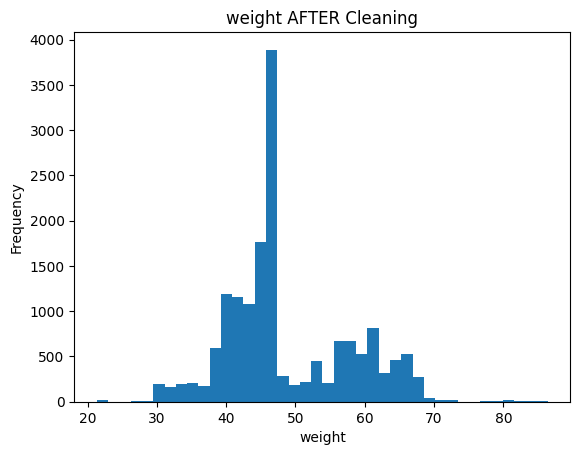

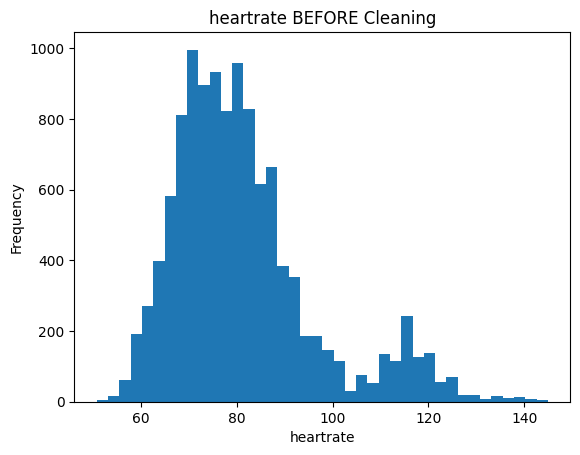

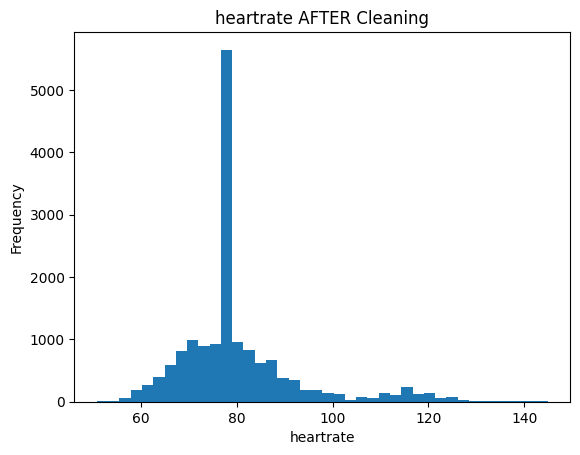

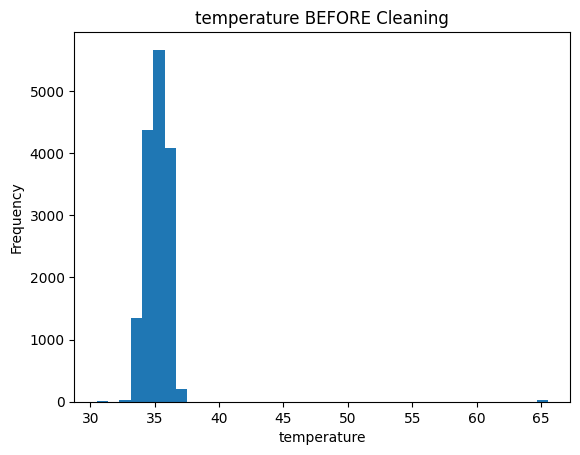

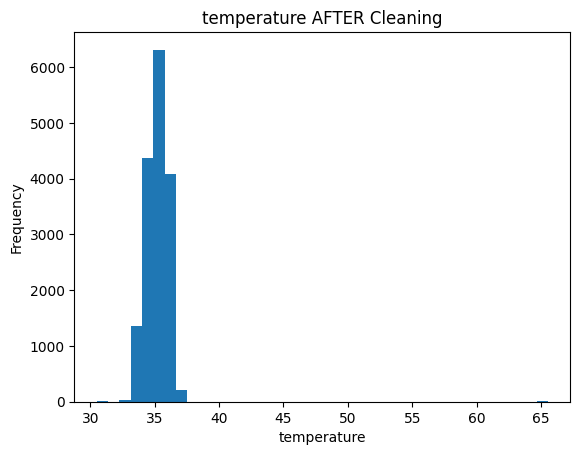

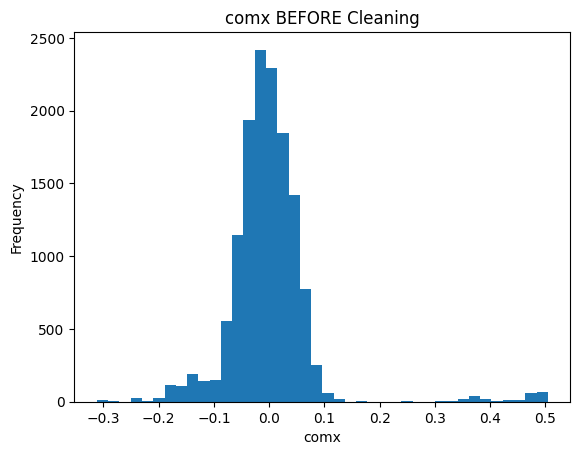

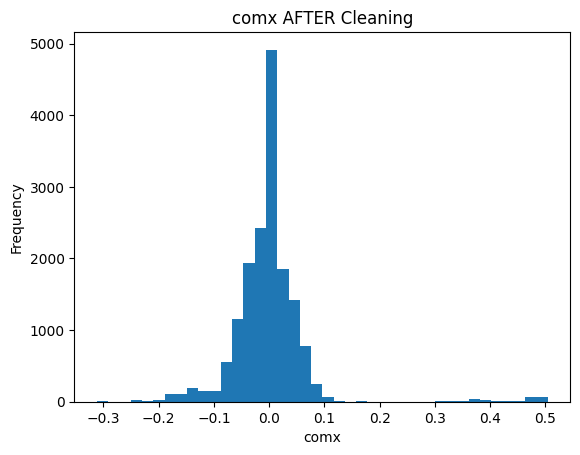

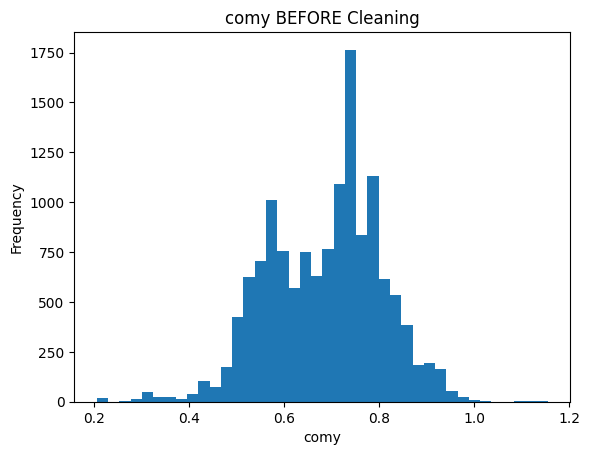

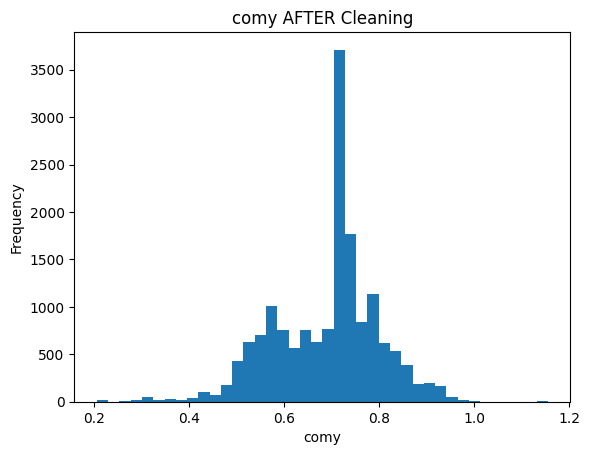

In [30]:
# 3. BEFORE vs AFTER DISTRIBUTIONS

for col in numeric_cols:
    plt.figure()
    plt.hist(data[col].dropna(), bins=40)
    plt.title(f"{col} BEFORE Cleaning")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure()
    plt.hist(data_clean[col], bins=40)
    plt.title(f"{col} AFTER Cleaning")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


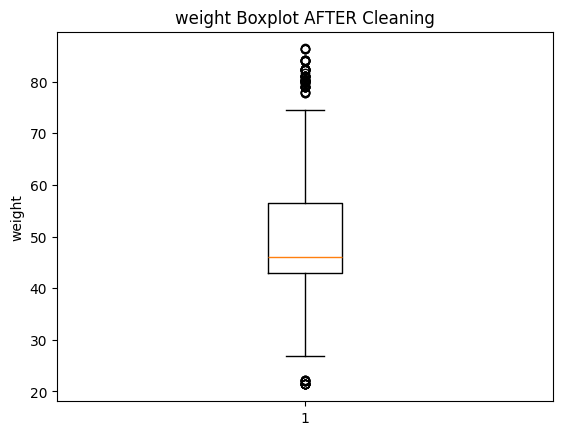

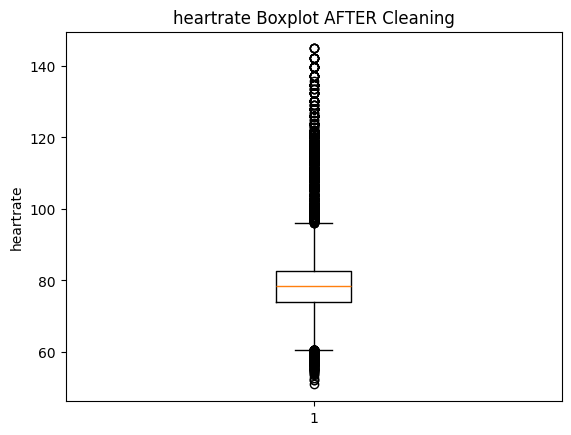

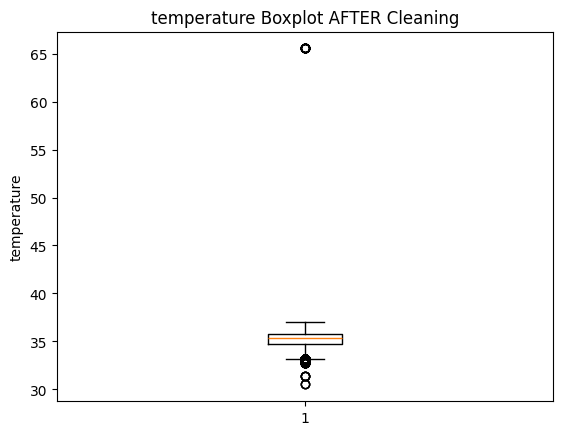

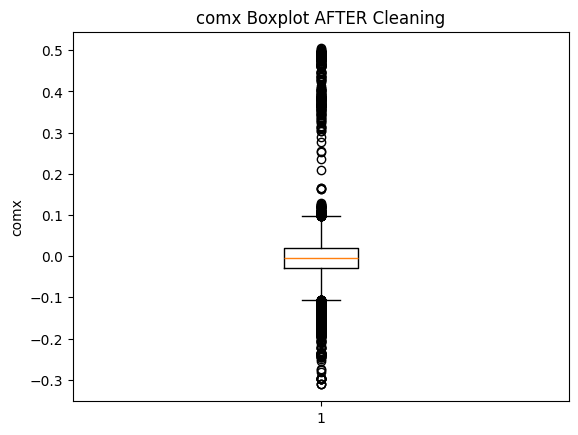

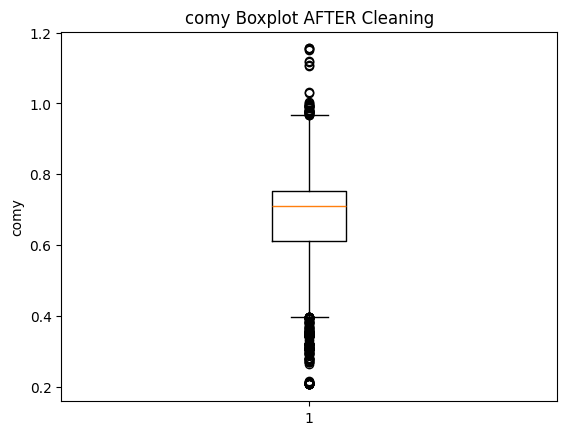

In [31]:
 #4. BOXPLOTS AFTER CLEANING

for col in numeric_cols:
    plt.figure()
    plt.boxplot(data_clean[col])
    plt.title(f"{col} Boxplot AFTER Cleaning")
    plt.ylabel(col)
    plt.show()

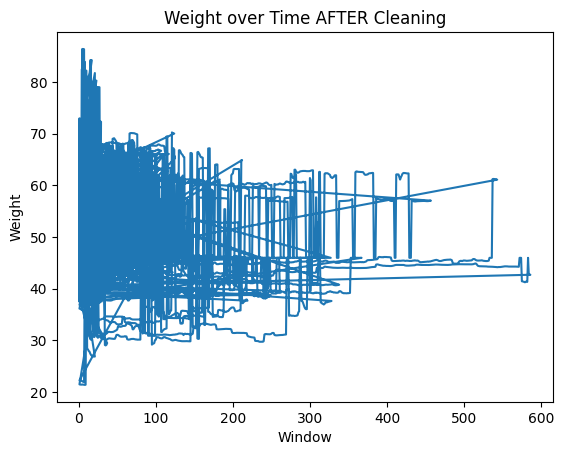

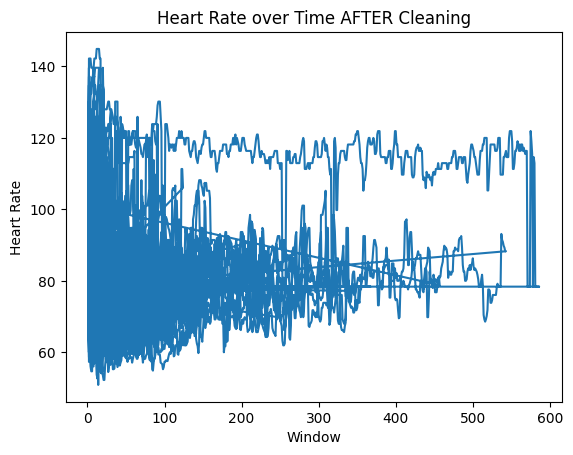

In [32]:
# 5. TIME SERIES AFTER CLEANING

plt.figure()
plt.plot(data_clean["window"], data_clean["weight"])
plt.title("Weight over Time AFTER Cleaning")
plt.xlabel("Window")
plt.ylabel("Weight")
plt.show()

plt.figure()
plt.plot(data_clean["window"], data_clean["heartrate"])
plt.title("Heart Rate over Time AFTER Cleaning")
plt.xlabel("Window")
plt.ylabel("Heart Rate")
plt.show()

# STEP 3: PREDICTION MODEL (CLASSIFICATION)
# Target: urinate

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
# . SELECT FEATURES & TARGET

features = ["weight", "heartrate", "temperature", "comx", "comy"]
X = data_clean[features]
y = data_clean["urinate"]

In [36]:
#3. TRAIN / TEST SPLIT 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [37]:
#4. FEATURE SCALING

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# 5. TRAIN MODEL

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# 6. PREDICTION

y_pred = model.predict(X_test_scaled)



In [40]:

# 7. EVALUATION METRICS

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8050640634533252


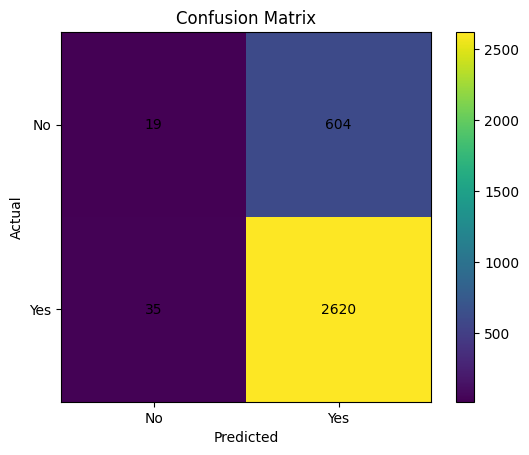

In [41]:
# 8. CONFUSION MATRIX

cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0, 1], ["No", "Yes"])
plt.yticks([0, 1], ["No", "Yes"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.show()

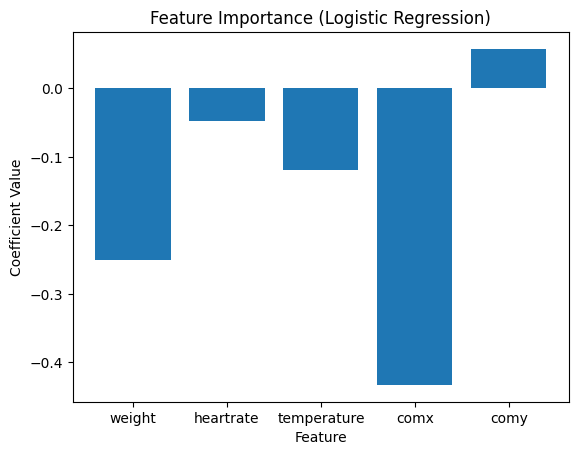

In [42]:
# 9. FEATURE IMPORTANCE (COEFFICIENTS)

importance = model.coef_[0]

plt.figure()
plt.bar(features, importance)
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.show()